## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
%config InlineBackend.figure_format = 'svg'


# 1. Data Exploration
<ul>
<li>Examine the Size of DataSet</li>
<li>Determine the NULL Values</li>
<li>Examine the DataSet</li>
<li>Identify the Outliers</li>
</ul>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the Data
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstons Projects/Exploratory Data Analysis/Telecom Churn.csv')

In [ ]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#visualize the data info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

### 1.1 Examine the size of Data

In [ ]:
#Examine the size of Data
data.shape

(3333, 20)

### 1.2 Determine the NULL Values

In [ ]:
#Determine the NULL Values
data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

### 1.3 Examine the DataSet

In [ ]:
#Examine the DataSet
data[['Total day minutes','Total day charge',
     'Total eve minutes','Total eve charge',
     'Total night minutes','Total night charge',
     'Total intl minutes','Total intl charge']].describe()

,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,179.775098,30.562307,200.980348,17.083540,200.872037,9.039325,10.237294,2.764581
std,54.467389,9.259435,50.713844,4.310668,50.573847,2.275873,2.791840,0.753773
min,0.000000,0.000000,0.000000,0.000000,23.200000,1.040000,0.000000,0.000000
25%,143.700000,24.430000,166.600000,14.160000,167.000000,7.520000,8.500000,2.300000
50%,179.400000,30.500000,201.400000,17.120000,201.200000,9.050000,10.300000,2.780000
75%,216.400000,36.790000,235.300000,20.000000,235.300000,10.590000,12.100000,3.270000
max,350.800000,59.640000,363.700000,30.910000,395.000000,17.770000,20.000000,5.400000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

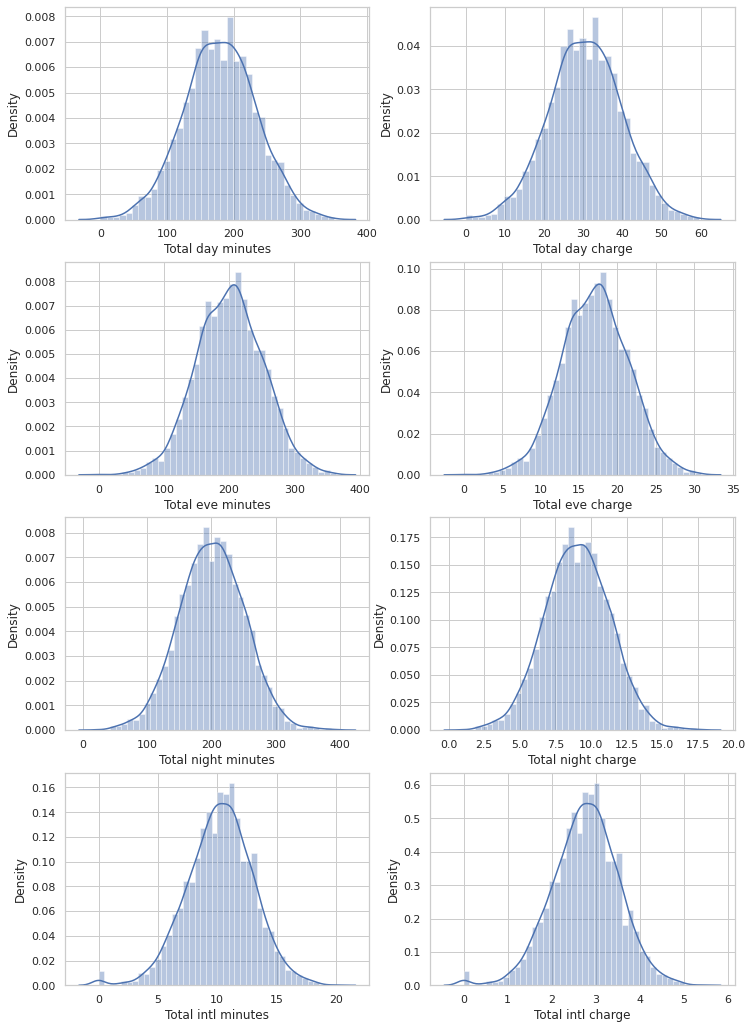

In [ ]:
#Examine the Frequency Distribution
fig, ax = plt.subplots(figsize = (12,18))
plt.subplot(4,2, 1)
sns.distplot(data['Total day minutes'])
plt.subplot(4,2,2)
sns.distplot(data['Total day charge'])
plt.subplot(4,2,3)
sns.distplot(data['Total eve minutes'])
plt.subplot(4,2,4)
sns.distplot(data['Total eve charge'])
plt.subplot(4,2,5)
sns.distplot(data['Total night minutes'])
plt.subplot(4,2,6)
sns.distplot(data['Total night charge'])
plt.subplot(4,2,7)
sns.distplot(data['Total intl minutes'])
plt.subplot(4,2,8)
sns.distplot(data['Total intl charge'])

### 1.4 Identifying The Outliers

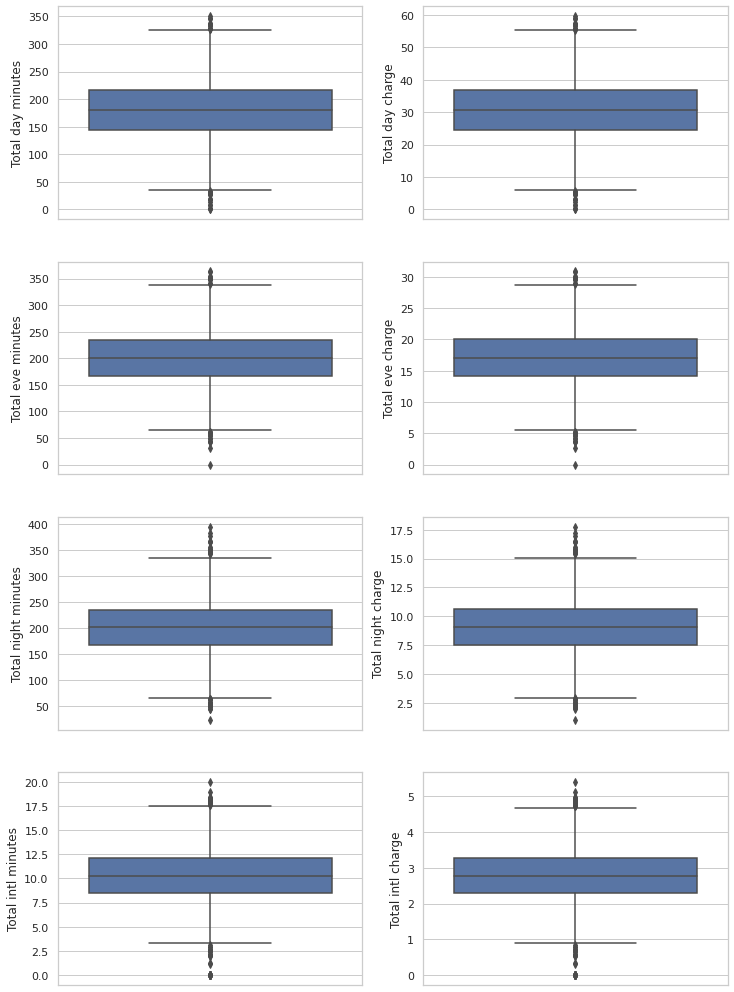

In [ ]:
fig, ax = plt.subplots(figsize = (12,18))
plt.subplot(4,2, 1)
sns.boxplot(y=data['Total day minutes'])
plt.subplot(4,2,2)
sns.boxplot(y=data['Total day charge'])
plt.subplot(4,2,3)
sns.boxplot(y=data['Total eve minutes'])
plt.subplot(4,2,4)
sns.boxplot(y= data['Total eve charge'])
plt.subplot(4,2,5)
sns.boxplot(y= data['Total night minutes'])
plt.subplot(4,2,6)
sns.boxplot(y=data['Total night charge'])
plt.subplot(4,2,7)
sns.boxplot(y= data['Total intl minutes'])
plt.subplot(4,2,8)
sns.boxplot(y = data['Total intl charge'])

# 2. Visualization

## 2.1 Correlation

In [99]:
#Correlation Matrix
corr_df = data.iloc[0:, 5:-2]
corr_df.corr()

,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge
Number vmail messages,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884
Total day minutes,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092
Total day calls,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666
Total day charge,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094
Total eve minutes,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067
Total eve calls,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674
Total eve charge,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074
Total night minutes,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180
Total night calls,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630
Total night charge,0.007663,0.004300,0.022927,0.004301,-0.012593,-0.002056,-0.012601,0.999999,0.011188,1.000000,-0.015214,-0.012329,-0.015186


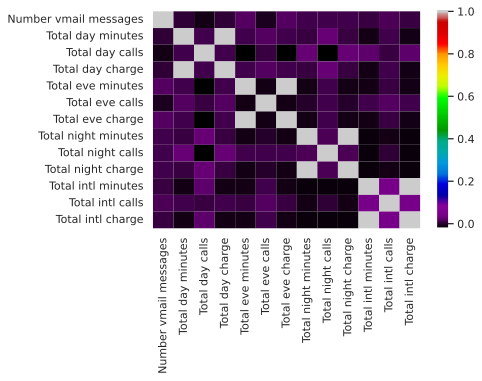

In [100]:
#Correlation HeatMap
sns.heatmap(corr_df.corr(),cmap= 'nipy_spectral')

####<b>Since the 'Total day charge', 'Total eve charge', 'Total night charge' & 'Total intl charge' are are directly depended on 'total day call', 'total eve calls', 'total night calls', 'total intl calls' respectively. Therefore they doesn't add any additional information. So, let's remove them.

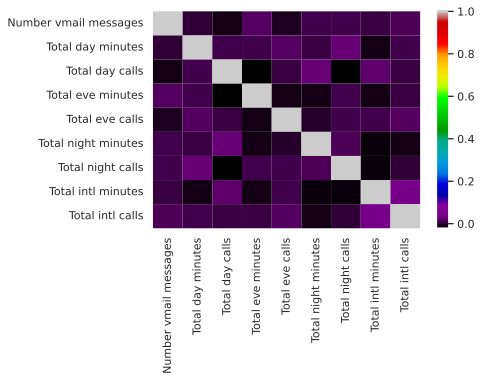

In [101]:
corr_df = corr_df.drop(['Total day charge','Total eve charge','Total night charge','Total intl charge'], axis=1)
sns.heatmap(corr_df.corr(), cmap='nipy_spectral')

## 2.2 International Plan relation with Churn





In [23]:
intr_churn_df = data[['International plan', 'Churn']]

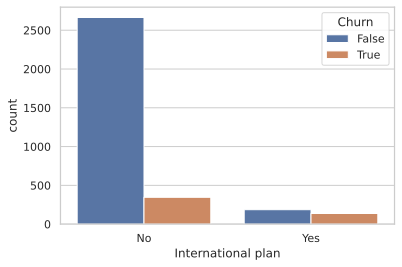

In [27]:
sns.countplot(x='International plan', data=intr_churn_df, hue='Churn')

## 2.3 Voice Plan relation with Churn

In [42]:
voic_churn_df = data[['Voice mail plan','Churn']]

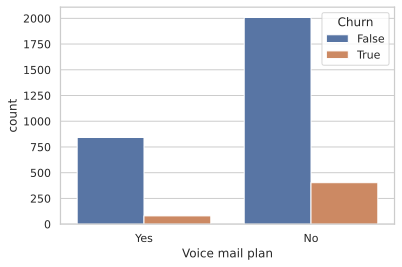

In [43]:
sns.countplot(x='Voice mail plan', data=voic_churn_df, hue='Churn')